Decision Tree
Titanic Survival Dataset

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('train_titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# prepare x and y
from sklearn.model_selection import train_test_split
x= df.drop(columns='Survived')
y=df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

( (x.shape,y.shape) ), (x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(((891, 11), (891,)), ((668, 11), (223, 11), (668,), (223,)))

In [5]:
#Print the number of missing values in each column of train and test data
print("Train follwed by test")
(x_train.isnull().sum(),y_train.isnull().sum() ), (x_test.isnull().sum(),y_test.isnull().sum())

Train follwed by test


((PassengerId      0
  Pclass           0
  Name             0
  Sex              0
  Age            132
  SibSp            0
  Parch            0
  Ticket           0
  Fare             0
  Cabin          519
  Embarked         2
  dtype: int64,
  0),
 (PassengerId      0
  Pclass           0
  Name             0
  Sex              0
  Age             45
  SibSp            0
  Parch            0
  Ticket           0
  Fare             0
  Cabin          168
  Embarked         0
  dtype: int64,
  0))

DataVisualization

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


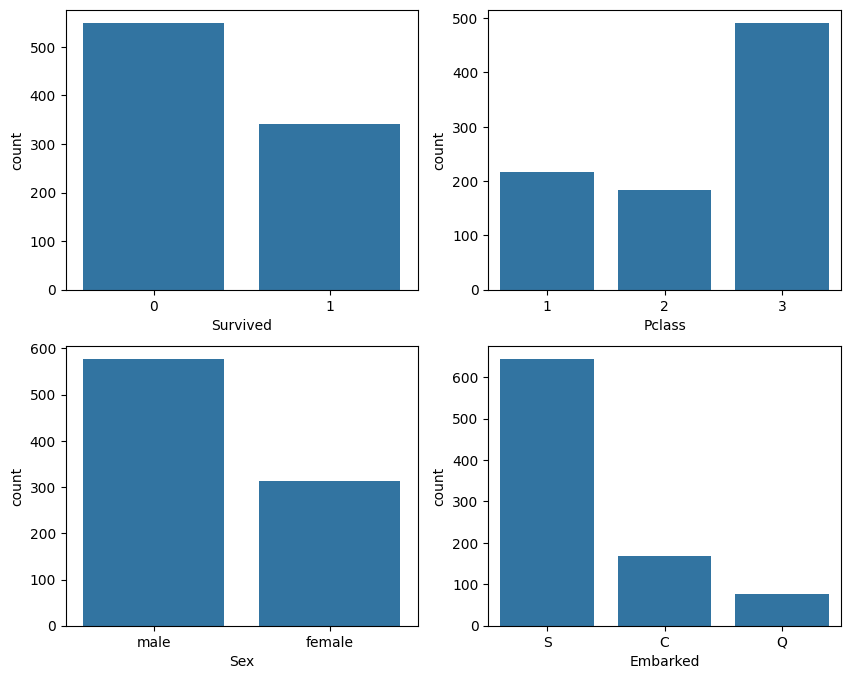

In [7]:
#Barchart of Survived, Pclass, Sex, Embarked

barCols = df[['Survived','Pclass','Sex','Embarked']]

fig,axes = plt.subplots(2,2,figsize=(10,8))
axes = axes.flatten()

for i,col in enumerate(barCols):
  sns.countplot(data=df,x=col,ax=axes[i])
 






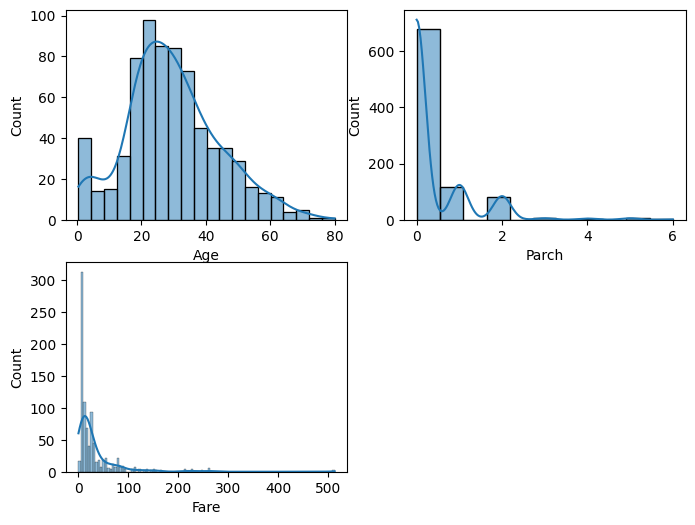

In [8]:
#Histogram of Age, Parch, Fare

histCols = df[['Age','Parch','Fare']]

fig,axes= plt.subplots(2,2,figsize=(8,6))
axes=axes.flatten()

for i,col in enumerate(histCols):
  sns.histplot(data=df,x=col,ax=axes[i],kde=True)
  
plt.delaxes(axes[3])

<Axes: xlabel='Age', ylabel='Count'>

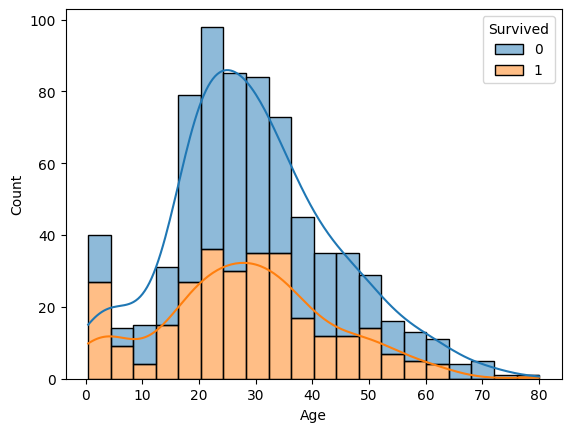

In [9]:

#  Plot histogram of age for survived and did not survived class

sns.histplot(data=df,x='Age',hue='Survived',multiple='stack',kde=True)


In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


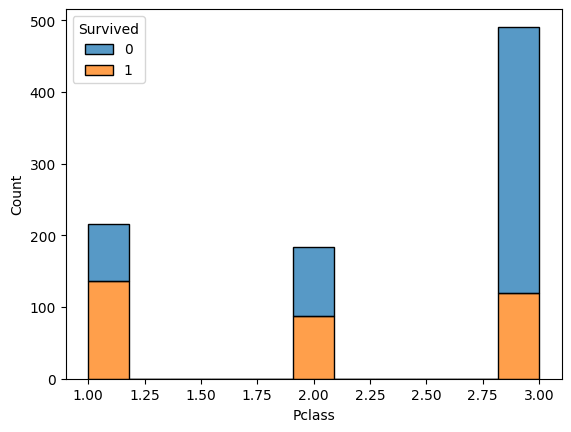

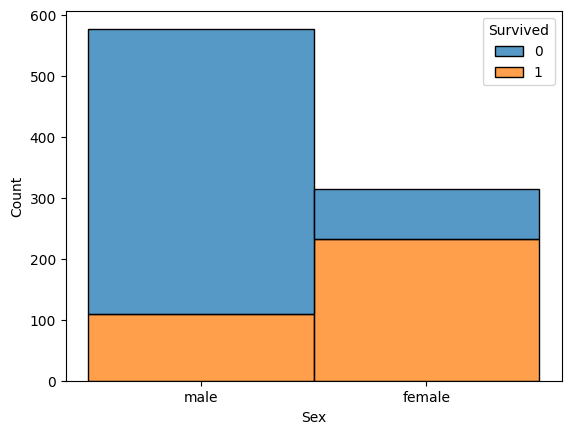

In [11]:
#Count class and gender wise survival rate - plot with appropriate char

histcols = df[['Pclass','Sex']]

# fig,axes=plt.subplots(2,1,figsize=(8,6))
# axes=axes.flatten()

for i,col in enumerate(histcols):
  sns.histplot(data=df,x=col,hue='Survived',multiple='stack')
  plt.show()
  


<Axes: xlabel='Age', ylabel='Count'>

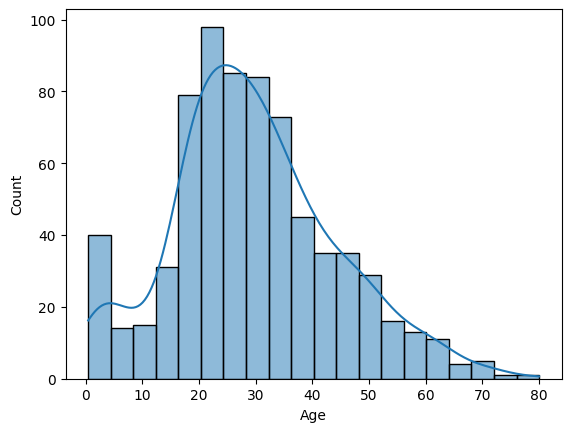

In [12]:
# age hist
agehist=df['Age']

sns.histplot(data=df,x=agehist,kde=True)

Handling missing valeus..

In [13]:
#Replace the mising values in Embarked column by 'S'
df['Embarked'] =df['Embarked'].fillna('S')
# print(df['Embarked'].isna().sum())  # Should show 0 now
df['Embarked'].isna().sum()


0

In [14]:
#Impute the missing values in Fare column with median value
df['Fare']= df['Fare'].fillna(df['Fare'].mode().iloc[0])


In [15]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data
n_missing = df['Age'].isna().sum()

age_mean = df['Age'].mean()

age_std = df['Age'].std()


random_ages = np.random.normal(loc=age_mean,scale=age_std,size=n_missing)
# Fill the missing values
df.loc[df['Age'].isna(),'Age']=random_ages

Feature Engineering - Creating new features

In [16]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
# df['FamilySize']=df['SibSp']+df['Parch']+1

print(df.shape)
df['FamilySize'] = df['SibSp']+df['Parch']+1
print(df.shape)
#FamilySize = Parch + SibSp + 1

(891, 12)
(891, 13)


In [17]:
# Create new feature IsAlone from FamilySize
df['isAlone']=df['FamilySize']==1
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,isAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,2,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,2,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,2,False
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,1,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,38.687911,1,2,W./C. 6607,23.4500,NaN,S,4,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1,True


In [18]:
#Prepare X and y 

x = df.drop(columns=['Survived'])
y = df['Survived']

In [19]:
# Label encoding of categorical features

from sklearn.preprocessing import LabelEncoder

cols = df.select_dtypes(include=['object']).columns


for col in cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])

# df.dtypes
# df[cols]

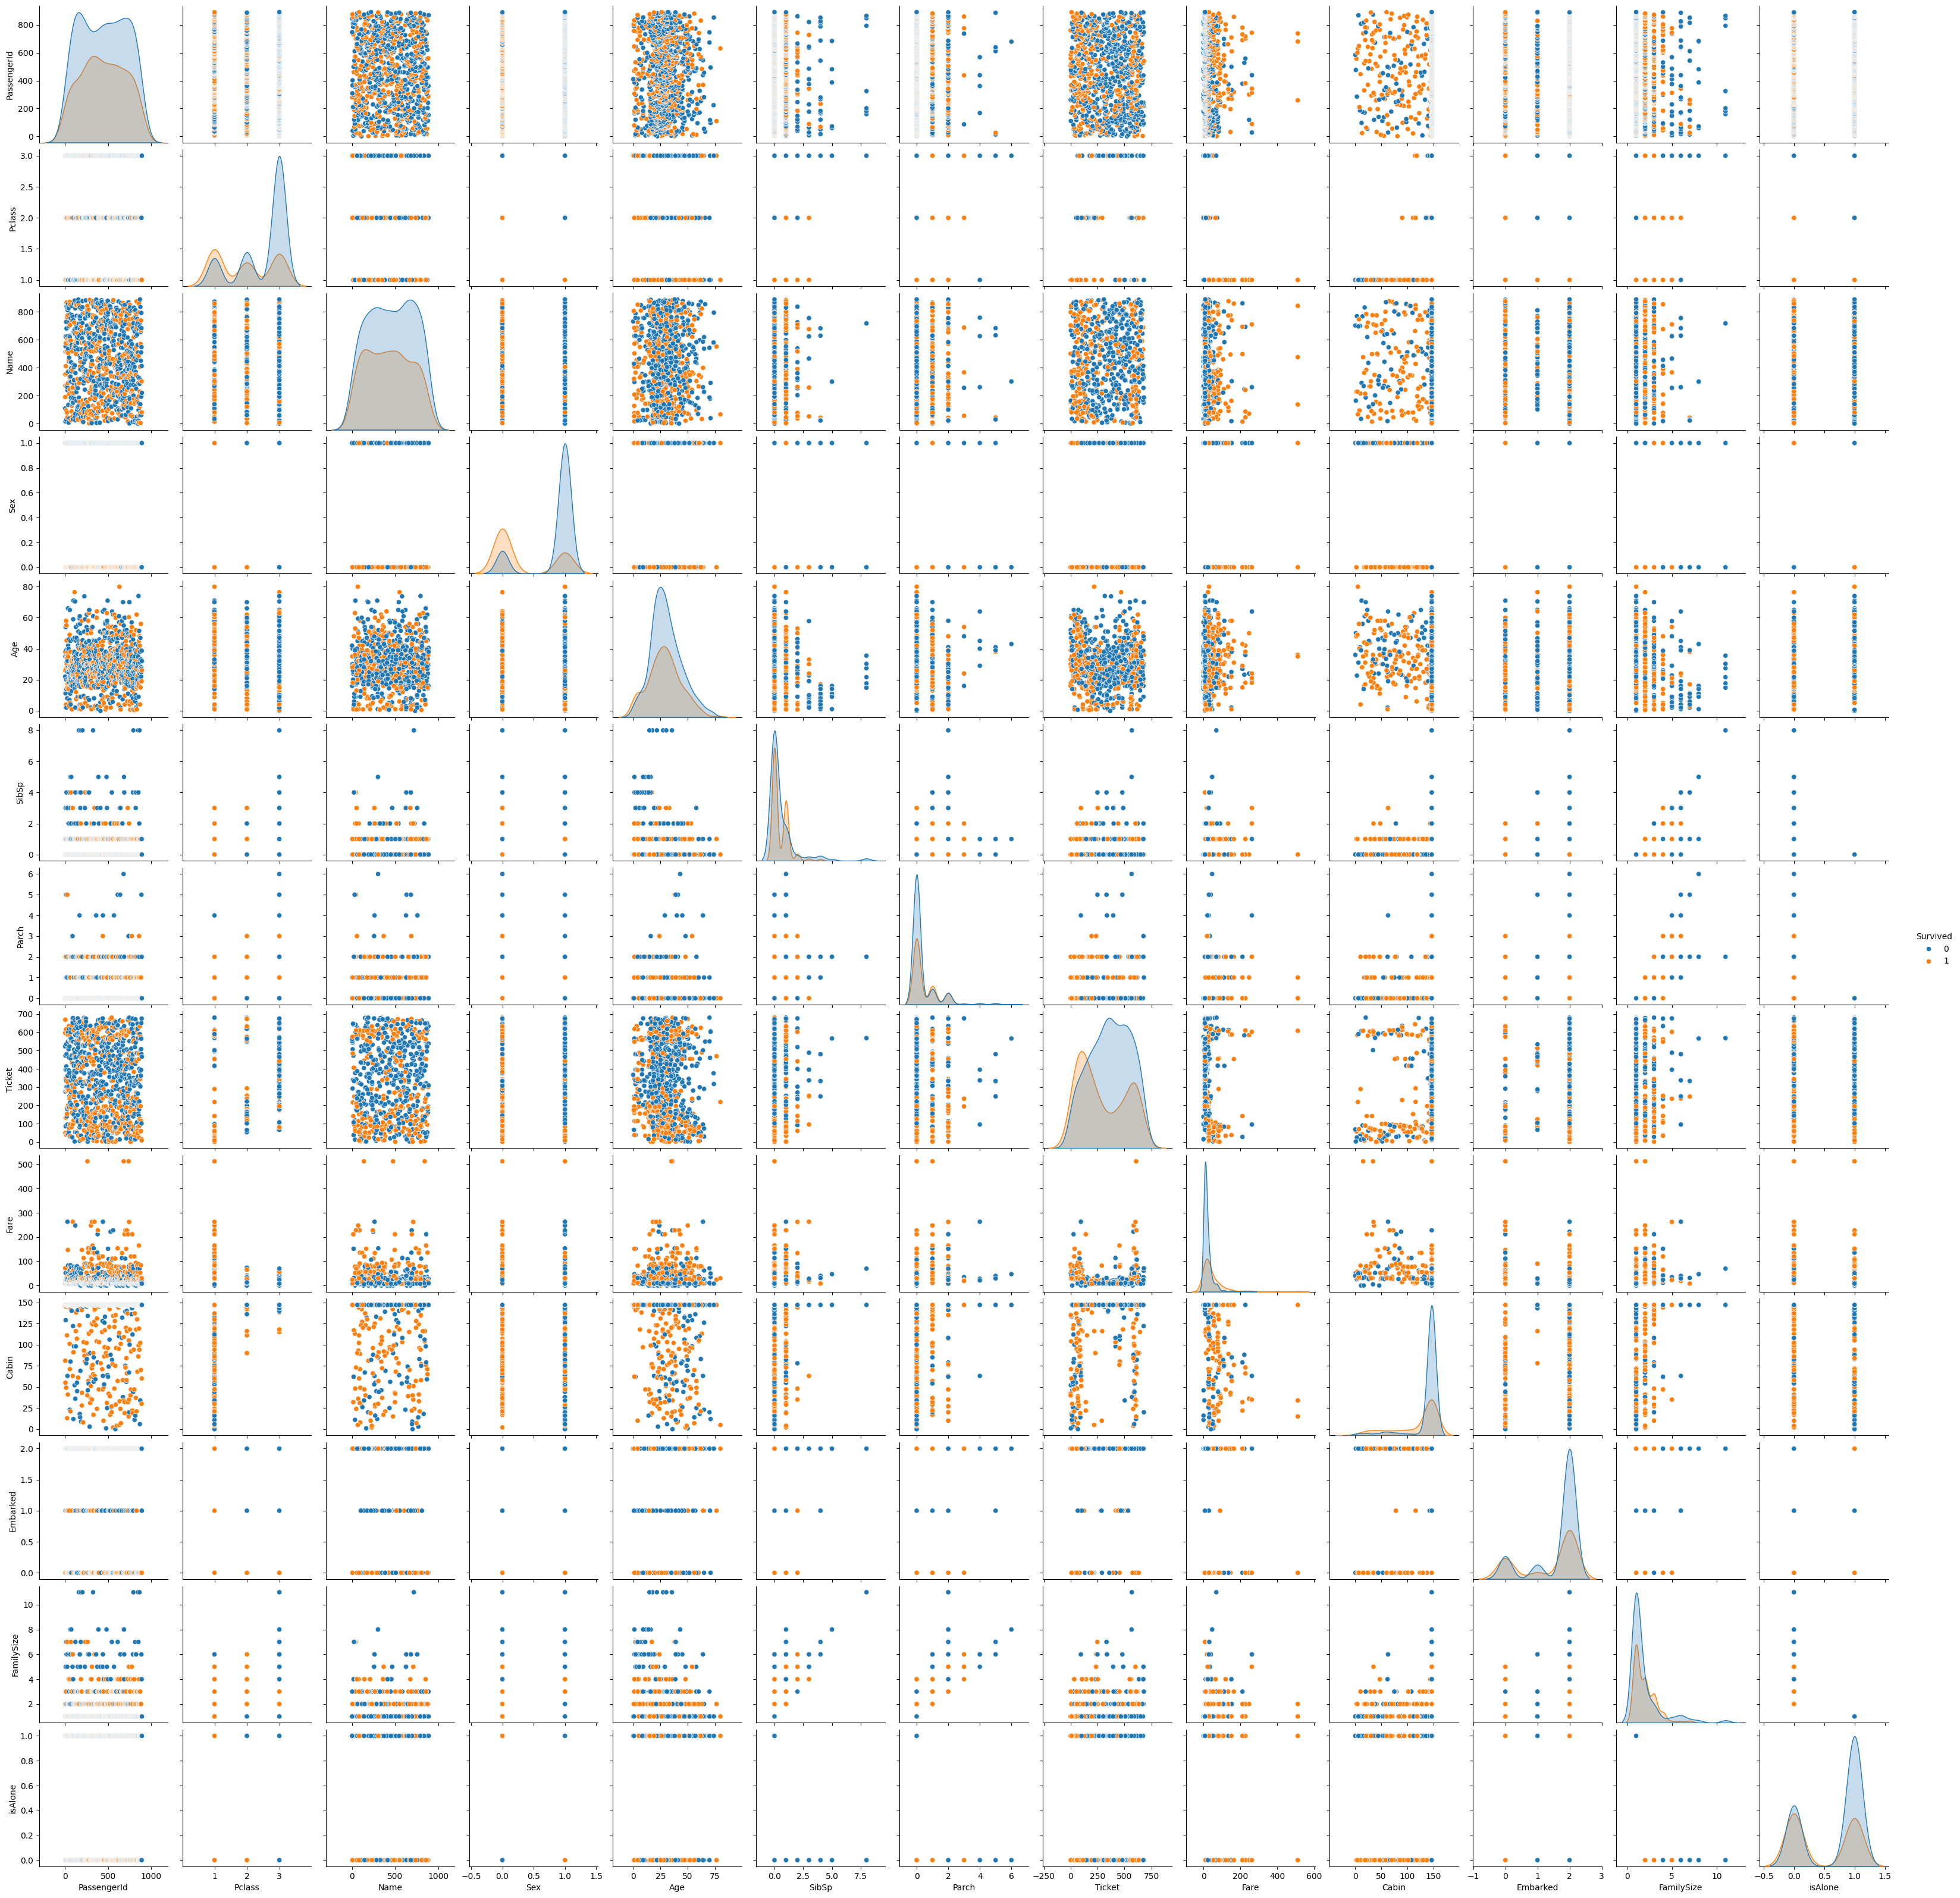

In [20]:
#Do a pairplot of all features
sns.pairplot(df,hue='Survived')

In [21]:
# Splitting the data into train and validation set - 90% train 10% validation
#X_train, X_test, y_train, y_validation

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_validation = train_test_split(x,y,test_size=0.1,random_state=42)

In [22]:
# Importing decision tree classifier from sklearn library

from sklearn.tree import DecisionTreeClassifier

# create model..
model = DecisionTreeClassifier(criterion='entropy')
# Fitting the decision tree with default hyperparameters
model.fit(x_train,y_train)


ValueError: could not convert string to float: 'Goldsmith, Master. Frank John William "Frankie"'

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Drop columns that are not useful or cause issues
# df = df.drop(['Name', 'Ticket', 'Cabin'])

# # # Encode categorical variables
# le = LabelEncoder()
# df['Sex'] = le.fit_transform(df['Sex'])
# df['Embarked'] = le.fit_transform(df['Embarked'])

# Now split again and train
x = df.drop('Survived', axis=1)
y = df['Survived']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train, y_train)  # should work now


In [ ]:
# validation

y_predict = model.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

In [ ]:
# tree
from sklearn import tree

plt.figure(figsize=(10,10))
tree.plot_tree(model,max_depth=2,filled=True)

plt.show()

In [ ]:
# tree.plot_tree(model, feature_names=x.columns, class_names=["No", "Yes"], filled=True, rounded=True, fontsize=10, precision=2,max_depth=2)

from sklearn import tree

plt.figure(figsize=(10,10))

tree.plot_tree(model,max_depth=3,filled=True,fontsize=10, precision=2,feature_names=df.columns)

plt.show()

NameError: name 'plt' is not defined